In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
mall_data=pd.read_csv(r"/content/customer_shopping_data.csv")
df1=pd.DataFrame(mall_data)

In [ ]:
df1

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,05-08-2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12-12-2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,09-11-2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16-05-2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24-10-2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21-09-2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22-09-2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28-03-2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16-03-2021,Istinye Park


In [4]:
df=df1.head(2000)

##Data Preprocessing
* Checking for NaN values
* Replacing NaN values with column mean

In [5]:
null=df.isnull().sum().sum()

In [7]:
df = df.fillna(df.select_dtypes(include=[float, int]).mean())

In [6]:
df


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,05-08-2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12-12-2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,09-11-2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16-05-2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24-10-2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
1995,I333609,C284405,Male,35,Food & Beverage,3,15.69,Credit Card,31-12-2022,Metrocity
1996,I241328,C727904,Female,32,Clothing,3,900.24,Credit Card,12-08-2022,Metropol AVM
1997,I296235,C273813,Male,57,Clothing,5,1500.40,Debit Card,04-09-2022,Mall of Istanbul
1998,I312185,C271739,Female,45,Toys,1,35.84,Credit Card,11-10-2021,Mall of Istanbul


In [8]:
na_sum = 0
for col in df:
    na_sum += df[col].isnull().sum()

print("Total number of missing values:", na_sum)

Total number of missing values: 0


##Exploratory Data Analysis
* Gender Count
* Age Distribution
* Category-wise purchase count
* Payment method count

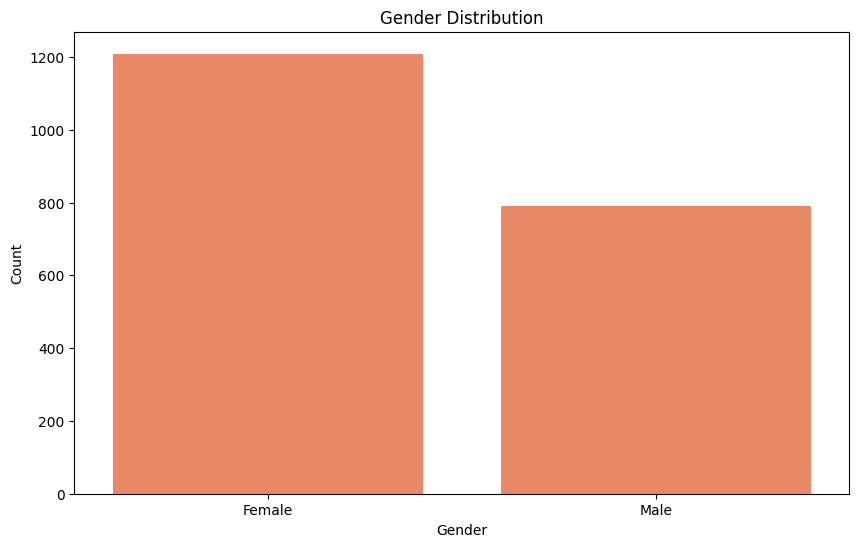

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=df, color='coral')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

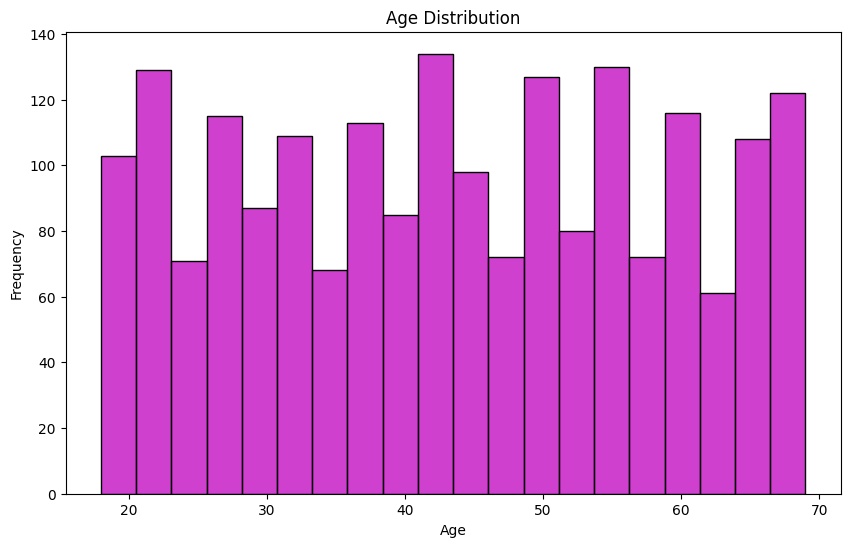

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, color='m')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


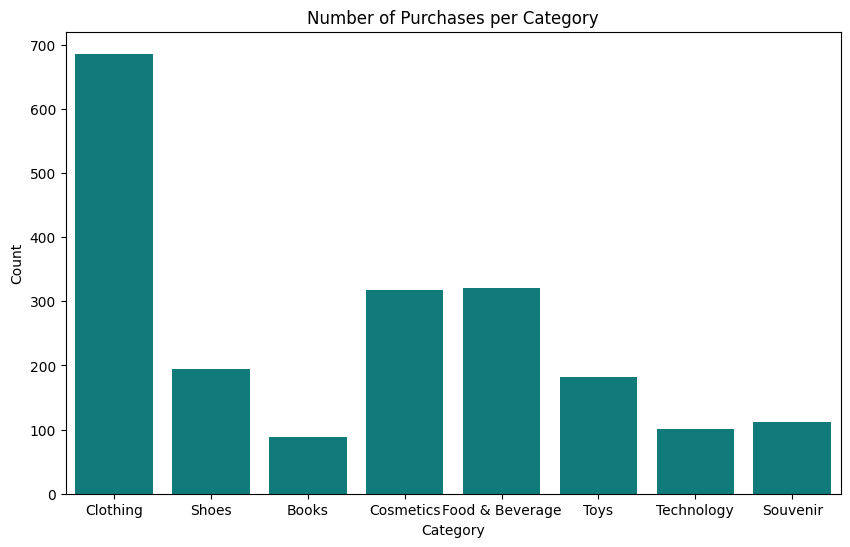

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df, color='darkcyan')
plt.title('Number of Purchases per Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

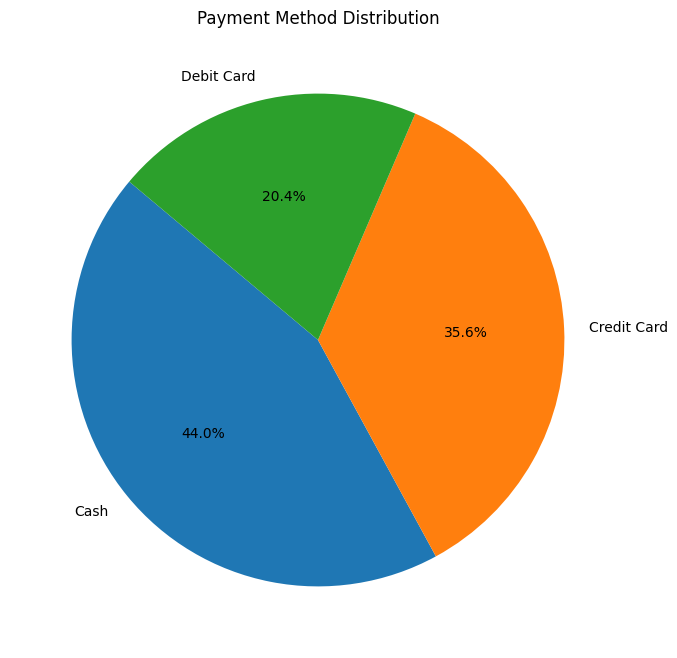

In [13]:

payment_counts = df['payment_method'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Payment Method Distribution')
plt.show()

##Using Machine Learning Model
*Type: Clustering*

*Model: KMeans*


---



###1. Creating a Scatter Plot


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Silhouette Score: 0.7055945334331878
DBSCAN Silhouette Score: 0.6678991446897605


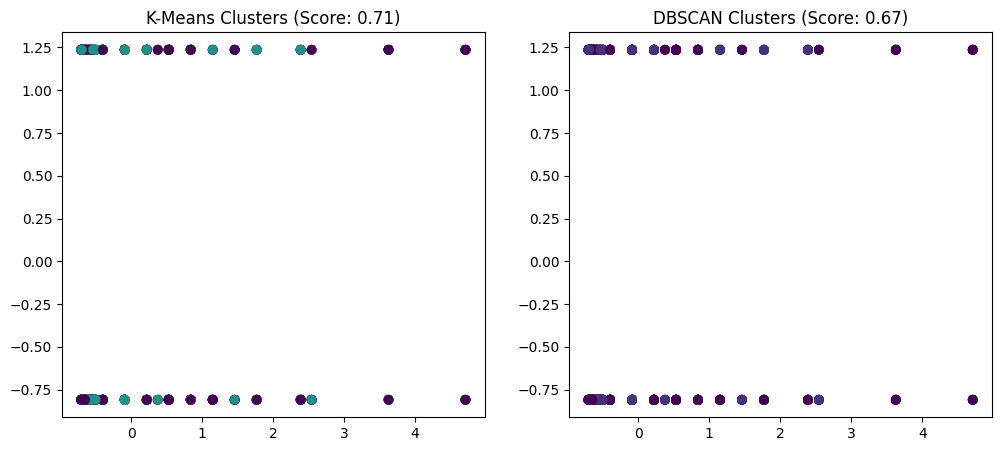

In [32]:

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++')
kmeans_labels = kmeans.fit_predict(X_sample)
kmeans_score = silhouette_score(X_sample, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_score}')

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_sample)
dbscan_score = silhouette_score(X_sample, dbscan_labels)
print(f'DBSCAN Silhouette Score: {dbscan_score}')

# Visualize the clusters using the original features
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# K-Means Plot
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
axes[0].set_title(f'K-Means Clusters (Score: {kmeans_score:.2f})')

# DBSCAN Plot
axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
axes[1].set_title(f'DBSCAN Clusters (Score: {dbscan_score:.2f})')

plt.show()


###2. Mapping Categorical Variables into Integers

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Assuming df is your DataFrame containing the data

# Preprocessing
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['category'] = df['category'].astype('category').cat.codes

# Select relevant features for clustering
features = ['price', 'gender']
X = df[features]


In [17]:
X

,price,gender
0,1500.40,0
1,1800.51,1
2,300.08,1
3,3000.85,0
4,60.60,0
...,...,...
1995,15.69,1
1996,900.24,0
1997,1500.40,1
1998,35.84,0


###3. Tranforming to Standized Data


In [18]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Sample a subset of data for faster computation
sample_size = min(2000, X_scaled.shape[0])
X_sample = X_scaled[np.random.choice(X_scaled.shape[0], sample_size, replace=False)]


In [19]:
X_sample

array([[-0.69254501, -0.80886323],
       [ 0.84009936, -0.80886323],
       [ 1.14978588, -0.80886323],
       ...,
       [-0.39852289, -0.80886323],
       [-0.681194  , -0.80886323],
       [-0.39852289,  1.23630296]])

In [20]:
has_nan = np.isnan(X_scaled)
has_nan

array([[False, False],
       [False, False],
       [False, False],
       ...,
       [False, False],
       [False, False],
       [False, False]])

In [21]:
col_means = np.nanmean(X_scaled, axis=0)

# Find indices where NaN values are present
inds = np.where(np.isnan(X_scaled))

# Replace NaN values with the corresponding column mean
X_scaled[inds] = np.take(col_means, inds[1])

###4. Elbow Curve for Obtaining K Value

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

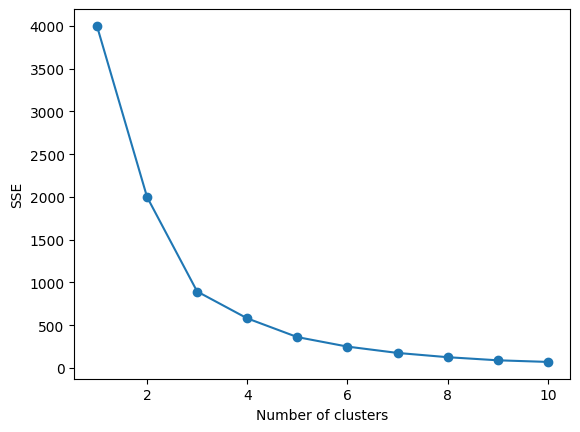

In [25]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()



###5. Model Training and Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Silhouette Score: 0.7055945334331875
DBSCAN Silhouette Score: 0.6678991446897605


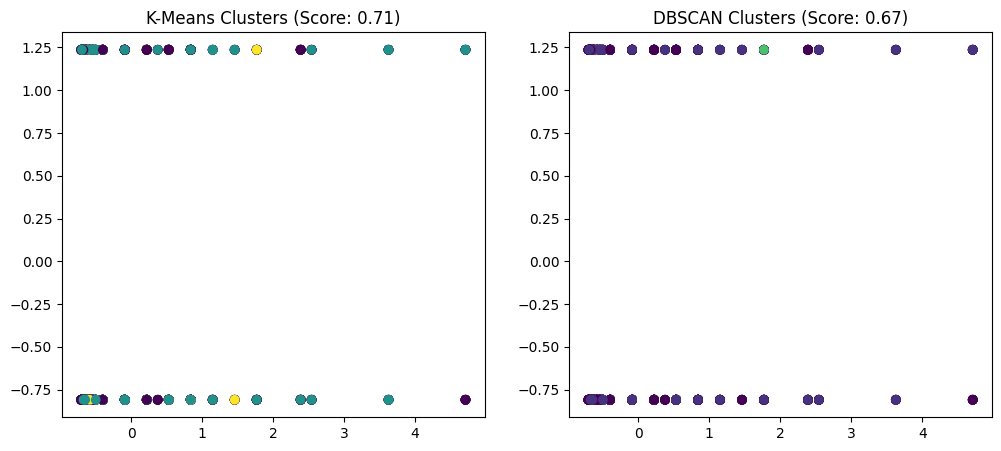

In [43]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++')
kmeans_labels = kmeans.fit_predict(X_sample)
kmeans_score = silhouette_score(X_sample, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_score}')

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_sample)
dbscan_score = silhouette_score(X_sample, dbscan_labels)
print(f'DBSCAN Silhouette Score: {dbscan_score}')

# Visualize the clusters using the original features
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# K-Means Plot
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
axes[0].set_title(f'K-Means Clusters (Score: {kmeans_score:.2f})')

# DBSCAN Plot
axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
axes[1].set_title(f'DBSCAN Clusters (Score: {dbscan_score:.2f})')

plt.show()


In [44]:
from sklearn.cluster import DBSCAN
#Apply K-means clustering
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_
df['cluster2']=DBSCAN.labels_
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan.fit(X_scaled)
df['cluster_dbscan'] = dbscan.labels_

# Analyze the clusters
cluster_analysis = df.groupby('cluster').mean()
print(cluster_analysis)
print(df.groupby('cluster').size())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: type object 'DBSCAN' has no attribute 'labels_'

In [47]:
# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42, init='k-means++')
kmeans_labels = kmeans.fit_predict(X_sample)


# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_sample)
dbscan_score = silhouette_score(X_sample, dbscan_labels)
print(f'DBSCAN Silhouette Score: {dbscan_score}')

# Visualize the clusters using the original features



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


DBSCAN Silhouette Score: 0.6678991446897605


Cluster Centers:
[[-0.5380456   1.23630296]
 [ 0.73262762 -0.80886323]
 [ 3.17472414  0.10009952]
 [-0.52859598 -0.80886323]
 [ 0.7093439   1.23630296]]


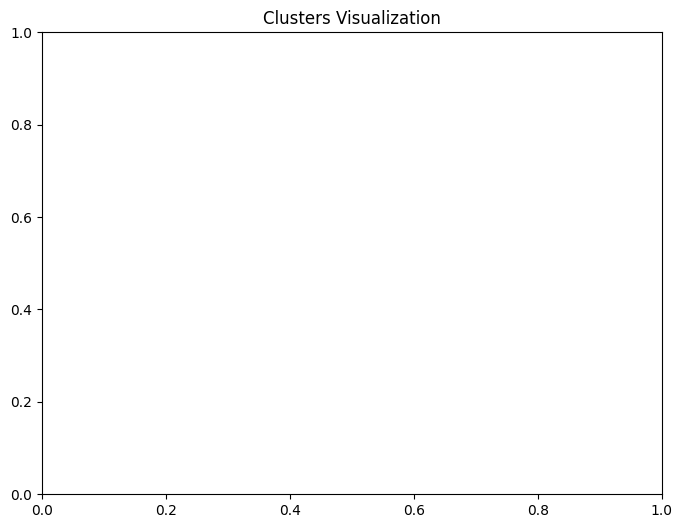

In [48]:
print("Cluster Centers:")
print(kmeans.cluster_centers_)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='gender', y='price', hue='cluster', palette='viridis')
plt.title('Clusters Visualization')
plt.show()

In [46]:
sample_size = min(2000, X_scaled.shape[0])
X_sample = X_scaled[np.random.choice(X_scaled.shape[0], sample_size, replace=False)]


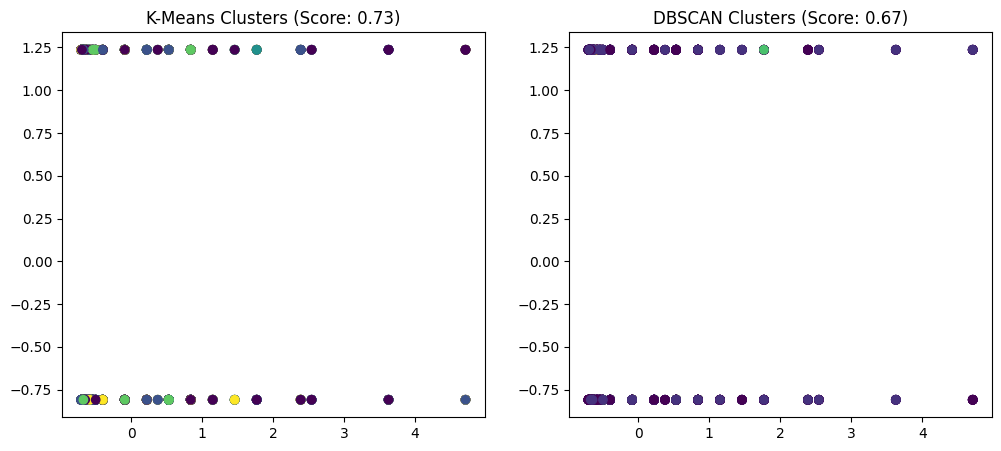

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# K-Means Plot
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
axes[0].set_title(f'K-Means Clusters (Score: {kmeans_score:.2f})')

# DBSCAN Plot
axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
axes[1].set_title(f'DBSCAN Clusters (Score: {dbscan_score:.2f})')

plt.show()

##Testing Model using Evaluation Metrices

In [37]:
kmeans_score = silhouette_score(X_sample, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_score}')
dbscan_score = silhouette_score(X_sample, dbscan_labels)
print(f'DBSCAN Silhouette Score: {dbscan_score}')

K-Means Silhouette Score: 0.7277853247181755
DBSCAN Silhouette Score: 0.6678991446897605


In [39]:
from sklearn.metrics import calinski_harabasz_score

ch_score = calinski_harabasz_score(X_scaled, df['cluster'])
print(f'Calinski-Harabasz Score for k means: {ch_score}')


Calinski-Harabasz Score for k means: 5042.79251884946


In [40]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X_scaled, df['cluster'])
print(f'Davies-Bouldin Score for k means: {db_score}')


Davies-Bouldin Score for k means: 0.5439173005375846


In [41]:
from sklearn.metrics import calinski_harabasz_score

ch_score = calinski_harabasz_score(X_scaled, df['cluster'])
print(f'Calinski-Harabasz Score for DBSCAN: {ch_score}')


Calinski-Harabasz Score for DBSCAN: 5042.79251884946


In [42]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X_scaled, df['cluster'])
print(f'Davies-Bouldin Score for DBSCAN: {db_score}')

Davies-Bouldin Score for DBSCAN: 0.5439173005375846
